# NX31 - Data Project

### Introduction

In the following data project, we  will be analyzing the public sector's distribution of workforce and compare it to the privat sector's. <br />
We will look into if the distribution of work force has changed since the financial crisis in 2008.

During the analysis, we will be doing the following.
* Etablish an API connection to feed the analysis data, from an external source.
* Clean and structure this data.
* Plot the data.
* Make an analysis and compare with the private sector.


### Packages imported

We will load in the following packages for this data project.

In [1]:
%load_ext autoreload
%autoreload 2

#these two lines above makes sure that the modules are automatically reloaded each time we run a cell

In [2]:
import numpy as np # Imports the numpy package
import matplotlib.pyplot as plt # Imports the matplotlib package from pyplot 
import pandas as pd # Imports the pandas dataframe package
import pydst # Imports the PyDST package

### Data

We have choose to use the PyDST package that can load data from Statistics Denmark using an API call. We put in the table id, that we want data from, and the package then returns the data from Statistics Denmark. </br>
We start off by looking into, what variables that are present in the table. We use this information when we load in the data, to only get the data we want. 

In [3]:
dst = pydst.Dst(lang='en') # creates a variable that sets the pydst package to load data variables in english.

FTEG_variables = dst.get_variables(table_id = 'OBESK2') #creates a variable that contains the variables from the table we look at
FTEG_variables # shows the variable

,elimination,id,text,time,values
0,True,SEKTOR,sector,False,"[{'id': '1032', 'text': 'General government'},..."
1,False,Tid,time,True,"[{'id': '2008K1', 'text': '2008Q1'}, {'id': '2..."


In [4]:
FTEG_variables['values'][0][:5] # shows the sectors in the table

[{'id': '1032', 'text': 'General government'},
 {'id': '1015', 'text': 'Central government'},
 {'id': '1020', 'text': 'Regional government'},
 {'id': '1025', 'text': 'Municipal government'},
 {'id': '1030', 'text': 'Social security funds'}]

### Creating Dictionaires

We create the following dictionaries to better structure the data and to create shorter or more precise variable names. </br>
We again use the variable names from above to make this dictionaires.

In [5]:
columns_dict = {} # creates a empty dictionairy, we fills the dictionary with keys and corosponding values.
# We use the variables seen earlier.
columns_dict['SEKTOR'] = 'Sector' 
columns_dict['TID'] = 'Quarter'
columns_dict['INDHOLD'] = 'FTE'

var_dict = {} # creates a empty dictionairy, we fills the dictionary with keys and corosponding values.
# We use the values seen earlier.
var_dict['Central government'] = 'Central'
var_dict['Regional government'] = 'Regional'
var_dict['Municipal government'] = 'Municipal'
var_dict['Social security funds'] = 'Social security funds'
var_dict['General government'] = 'Total'

### Importing Data

We now import data from Statistic Denmark using the PyDST. We use the variables we found above, so we only get the data that we need.
In this case we need all data from the table.

In [6]:
FTEG_raw = dst.get_data(table_id = 'OBESK2', variables = {'SEKTOR':['*'], 'Tid':['*']})
# Creates a variable that contains data from the table we put in.
FTEG_raw.head(20) #shows the first 20 data points in the table.

,SEKTOR,TID,INDHOLD
0,Central government,2008Q1,164276
1,Regional government,2008Q1,111410
2,Municipal government,2008Q1,431690
3,Social security funds,2008Q1,1921
4,General government,2008Q1,709297
5,Central government,2008Q2,167654
6,Regional government,2008Q2,107305
7,Municipal government,2008Q2,438649
8,Social security funds,2008Q2,1913
9,General government,2008Q2,715521


### Renaming variables
We use the dictionaries to rename the variables names.

In [7]:
FTEG_raw.rename(columns = columns_dict, inplace = True) # renames the columns, using the keys,
# which are the current columns names, and use the values in the dictionary instead

for key, value in var_dict.items():
    FTEG_raw.Sector.replace(key, value, inplace = True) # runs a for loop to replace the variable names,
    # matching the keys and values from the var_dict

FTEG_raw.head(20)

,Sector,Quarter,FTE
0,Central,2008Q1,164276
1,Regional,2008Q1,111410
2,Municipal,2008Q1,431690
3,Social security funds,2008Q1,1921
4,Total,2008Q1,709297
5,Central,2008Q2,167654
6,Regional,2008Q2,107305
7,Municipal,2008Q2,438649
8,Social security funds,2008Q2,1913
9,Total,2008Q2,715521


### Table

We create this table to give a better view of the data, with the quaters as index.

In [8]:
FTEG = FTEG_raw.copy().pivot(index = 'Quarter', columns = 'Sector', values = 'FTE')
# creates a copy and pivot the data using the 'Quarter' as the index.
FTEG.head(20)

Sector,Central,Municipal,Regional,Social security funds,Total
Quarter,,,,,
2008Q1,164276,431690,111410,1921,709297
2008Q2,167654,438649,107305,1913,715521
2008Q3,166319,433840,111262,1849,713270
2008Q4,170749,441479,114385,1843,728455
2009Q1,169315,442231,114244,1843,727633
2009Q2,172790,449778,116310,1873,740750
2009Q3,170775,445803,115956,1889,734423
2009Q4,173914,450609,118369,1896,744787
2010Q1,172563,450873,117452,1860,742748


### Descirbetive statistics



In [9]:
FTEG_raw.groupby(['Sector']).describe() # Gives a table of decribtive statistics for analysis.
# Showing the mean, the std., the minimum, the quartiles and the maximum

FTE                                                    \
                      count           mean           std       min        25%   
Sector                                                                          
Central                44.0  173199.977273   2665.832350  164276.0  172505.00   
Municipal              44.0  430653.113636  12017.772657  413069.0  420759.25   
Regional               44.0  118347.772727   3491.849366  107305.0  116019.00   
Social security funds  44.0    1940.386364     96.370462    1843.0    1876.00   
Total                  44.0  724141.159091  10917.445550  706772.0  716269.75   

                                                      
                            50%        75%       max  
Sector                                                
Central                173527.5  174949.50  177641.0  
Municipal              428491.5  439356.50  457033.0  
Regional               119047.0  121126.25  122494.0  
Social security funds    1902.0    1987.75    2147.0  
Total                  722094.5  728439.25  751954.0

### Plot of public sectors

Text(0.5, 1.0, 'Public full-time employed')

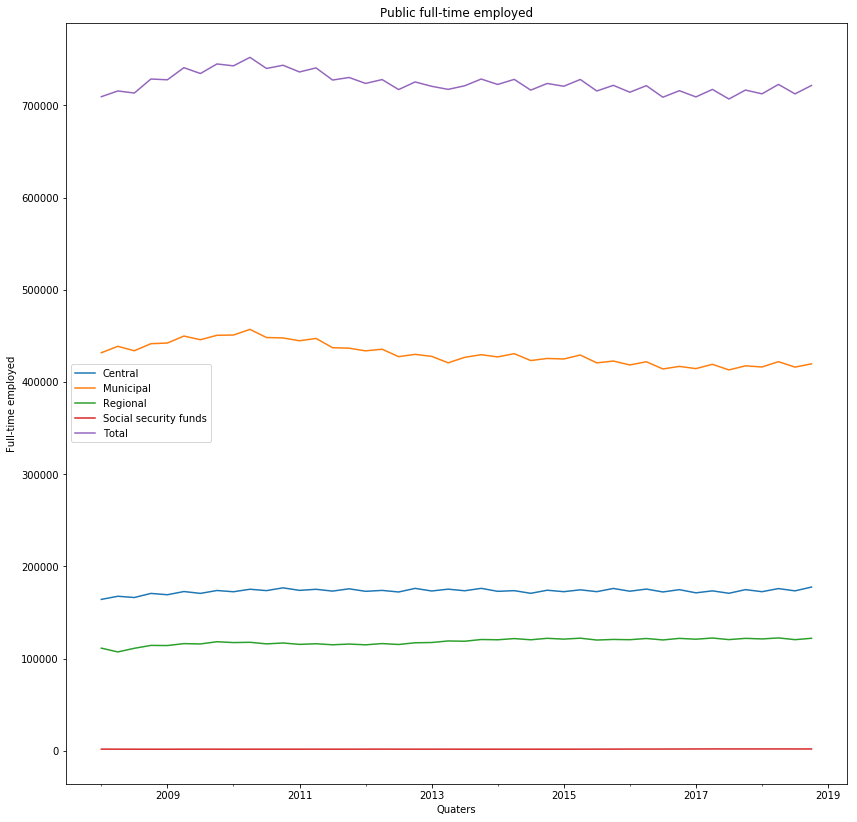

In [10]:
fig1, ax = plt.subplots(figsize=(14,14)) #creates a figure with only one subplot
FTEG_raw['Quarter'] = pd.to_datetime(FTEG_raw['Quarter']) # changes variable Quaters to a time format
# that pandas recognizes
FTEG_raw.set_index('Quarter').groupby('Sector')['FTE'].plot(x="Quarter", legend=True, ax=ax);
# sets index to new Quaters and plots the sectors values on y-axis
ax.set_ylabel("Full-time employed") # sets title for y-axis
ax.set_xlabel('Quaters') # sets title for x-axis
ax.set_title("Public full-time employed") # sets title for the figure

Looking at the plot, it seems the development for total public employment is primarily is driven by changes in the municipalities. To confirm we will have to look at he relative changes.

### Relative changes and merging

Now we will look at the relative development of each sector.
We create four dataframes, one for each sector, where we devide the specific sector with the total public employment.

In [11]:
rc_central = pd.DataFrame(data=FTEG['Central']/FTEG['Total']*100)
rc_municipal = pd.DataFrame(FTEG['Municipal']/FTEG['Total']*100)
rc_regional = pd.DataFrame(FTEG['Regional']/FTEG['Total']*100)
rc_social = pd.DataFrame(FTEG['Social security funds']/FTEG['Total']*100)
# the four lines of code above creates a pandas dataframe for the relative development,
# and we multiply the 100 to get our result in percentage.

In order to plot the relative development later, we need to merge the four dataframes into one. We do this in the following code.

In [12]:
rFTEG_1 = pd.merge(rc_central, rc_municipal, on='Quarter') # merging the dataframe for relative central and
# municipalty development changes, and thereby creating a new dataframe contianing relative central and
# municipalty development changes
rFTEG_2 = pd.merge(rFTEG_1, rc_regional, on='Quarter') # we merge the new dataframe with the datafram for
# relative regionale development changes
rFTEG = pd.merge(rFTEG_2, rc_social, on='Quarter') # and again with social

rFTEG.head(20) # we plot our new dataframe, but observe that the variable names are not correct,
# we will solve this in the following code

,0_x,0_y,0_x,0_y
Quarter,,,,
2008Q1,23.160397,60.861670,15.707102,0.270832
2008Q2,23.431038,61.304839,14.996765,0.267358
2008Q3,23.317818,60.824092,15.598862,0.259229
2008Q4,23.439883,60.604842,15.702411,0.253001
2009Q1,23.269285,60.776655,15.700772,0.253287
2009Q2,23.326358,60.719271,15.701654,0.252852
2009Q3,23.252948,60.701122,15.788721,0.257209
2009Q4,23.350837,60.501727,15.893000,0.254569
2010Q1,23.233048,60.703361,15.813169,0.250421


### Renaming


We rename the colums for our new dataframe with relative development.

In [13]:
rFTEG.columns = ['Central', 'Municipal', 'Regional', 'Social']

rFTEG.head(20)

,Central,Municipal,Regional,Social
Quarter,,,,
2008Q1,23.160397,60.861670,15.707102,0.270832
2008Q2,23.431038,61.304839,14.996765,0.267358
2008Q3,23.317818,60.824092,15.598862,0.259229
2008Q4,23.439883,60.604842,15.702411,0.253001
2009Q1,23.269285,60.776655,15.700772,0.253287
2009Q2,23.326358,60.719271,15.701654,0.252852
2009Q3,23.252948,60.701122,15.788721,0.257209
2009Q4,23.350837,60.501727,15.893000,0.254569
2010Q1,23.233048,60.703361,15.813169,0.250421


The following code needs to be run twice in order to get the quarters to show correctly, we are not sure why.

Text(0.5, 1.0, 'Share of total public employment')

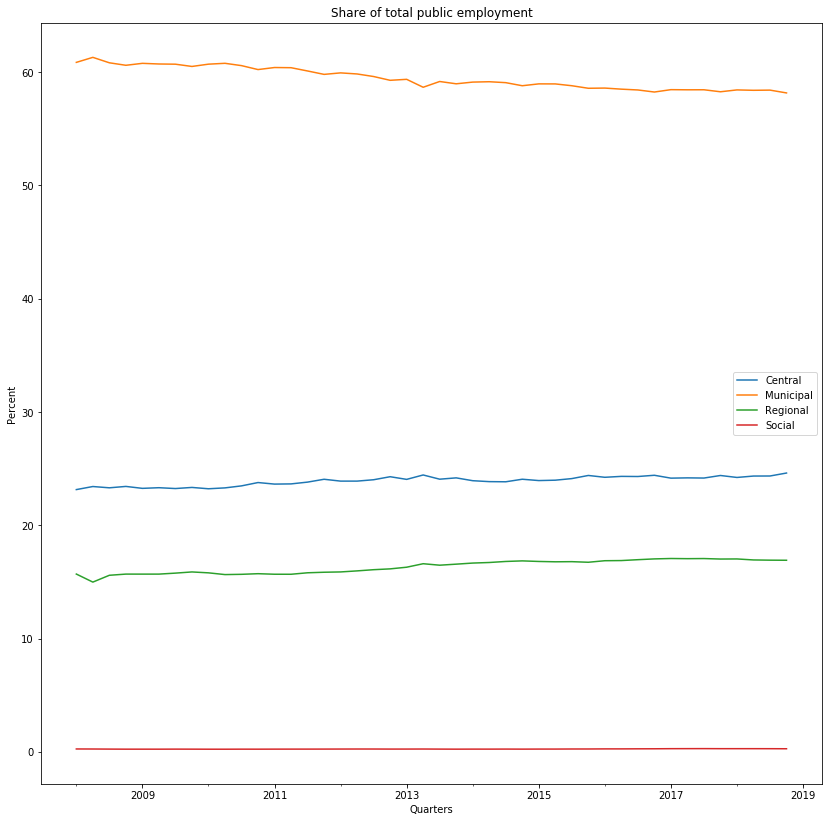

In [21]:
fig2, ax = plt.subplots(figsize=(14,14))
rFTEG.plot(legend=True, ax=ax);

rFTEG.reset_index(drop=True)
FTEG_raw.set_index('Quarter')
rFTEG.index = pd.DatetimeIndex(data=rFTEG.index)

ax.set_xlabel("Quarters")
ax.set_ylabel("Percent")
ax.set_title("Share of total public employment")

# move the legend, put numbers on the x-axis, maybe ""%"" on y-axis


"new data"

"variables"

In [15]:
# download new data and clean it

dst = pydst.Dst(lang='en')

EM_variables = dst.get_variables(table_id = 'LBESK21')
EM_variables

,elimination,id,text,time,values
0,False,TAL,unit,False,"[{'id': '1020', 'text': 'Employees'}, {'id': '..."
1,True,SEKTOR,sector,False,"[{'id': '1000', 'text': 'All sectors'}, {'id':..."
2,False,Tid,time,True,"[{'id': '2008K1', 'text': '2008Q1'}, {'id': '2..."


"dicts"

In [16]:
columns_dict3 = {}
columns_dict3['TAL'] = 'remove one of them? - lønmodtagere'
columns_dict3['SEKTOR'] = 'Sector'
columns_dict3['TID'] = 'Quarter'
columns_dict3['INDHOLD'] = 'FTE'

var_dict2 = {}
var_dict2['All sectors'] = 'Total'
var_dict2['Central government'] = 'Central'
var_dict2['Regional government'] = 'Regional'
var_dict2['Municipal government'] = 'Municipal'
var_dict2['Social security funds'] = 'Social'
var_dict2['Public corporations'] = 'Public corp'
var_dict2['Private corporations'] = 'Private corp'
var_dict2['Private nonprofit organizations'] = 'Private NPO'
var_dict2['Sector not stated'] = 'SNS'

"get data"

In [17]:
EM_raw = dst.get_data(table_id = 'LBESK21', variables = {'TAL':['*'], 'SEKTOR':['*'], 'Tid':['*']})
EM_raw

,TAL,SEKTOR,TID,INDHOLD
0,Full-time employees,All sectors,2008Q1,2245921
1,Full-time employees,Central government,2008Q1,164276
2,Full-time employees,Regional government,2008Q1,111410
3,Full-time employees,Municipal government,2008Q1,431690
4,Full-time employees,Social security funds,2008Q1,1921
5,Full-time employees,Public corporations,2008Q1,66524
6,Full-time employees,Private corporations,2008Q1,1419034
7,Full-time employees,Private nonprofit organizations,2008Q1,50890
8,Full-time employees,Sector not stated,2008Q1,176
9,Employees,All sectors,2008Q1,2685665


"rename"

In [18]:
EM_raw.rename(columns = columns_dict3, inplace = True)

for key, value in var_dict2.items():
    EM_raw.Sector.replace(key, value, inplace = True)

EM_raw

,remove one of them? - lønmodtagere,Sector,Quarter,FTE
0,Full-time employees,Total,2008Q1,2245921
1,Full-time employees,Central,2008Q1,164276
2,Full-time employees,Regional,2008Q1,111410
3,Full-time employees,Municipal,2008Q1,431690
4,Full-time employees,Social,2008Q1,1921
5,Full-time employees,Public corp,2008Q1,66524
6,Full-time employees,Private corp,2008Q1,1419034
7,Full-time employees,Private NPO,2008Q1,50890
8,Full-time employees,SNS,2008Q1,176
9,Employees,Total,2008Q1,2685665


"describe"

In [19]:
EM_raw.groupby(['Sector']).describe()

FTE                                                      \
             count          mean            std        min         25%   
Sector                                                                   
Central       88.0  1.852380e+05   12502.326539   164276.0   173527.75   
Municipal     88.0  4.661050e+05   37460.369578   413069.0   428853.75   
Private NPO   88.0  6.449664e+04    9742.488838    50579.0    54850.50   
Private corp  88.0  1.499315e+06  169861.230961  1256157.0  1330263.00   
Public corp   88.0  5.956807e+04    6098.314493    49765.0    55070.25   
Regional      88.0  1.250018e+05    7360.008627   107305.0   119120.00   
SNS           88.0  2.302500e+02      61.327883      131.0      175.50   
Social        88.0  2.033807e+03     135.864271     1843.0     1903.00   
Total         88.0  2.401989e+06  230050.725597  2090889.0  2168192.00   

                                                
                    50%         75%        max  
Sector                                          
Central        182418.5   197879.75   202006.0  
Municipal      472505.5   497782.75   526552.0  
Private NPO     62941.5    72676.75    83356.0  
Private corp  1506338.0  1637565.50  1809460.0  
Public corp     58913.0    63626.00    73789.0  
Regional       123723.0   132336.00   135208.0  
SNS               231.5      284.50      338.0  
Social           2047.5     2112.00     2347.0  
Total         2408689.5  2595487.00  2773787.0

"compare public and private to total employment"

"" skriv altid slut kommentar så vi ved hvor vi er og om det er den rigtige""
